In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Pretty display for notebooks
%matplotlib inline

In [126]:
#Parameters for this dataset

data_directory = "./data/"
out_directory = "./out/"

file_train = "train.csv"
file_test = "test.csv"

#Open data file
data_train_original = pd.read_csv(data_directory + file_train)
data_test_original = pd.read_csv(data_directory + file_test)

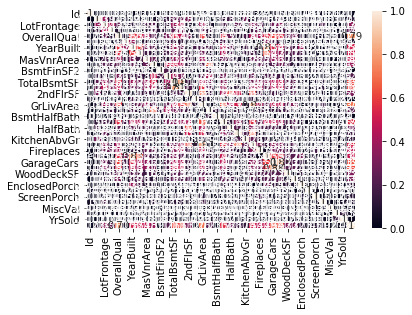

In [4]:
sns.heatmap(data_train_original.corr().abs(), annot=True)

## Fill in Missing Ages

In [91]:
def impute_by_regression(data, column):
    """fill in misssing values of a column by means of regression"""

    data_local = data.copy()
    data_train = data_local[~data_local[column].isnull()].copy()
    data_test = data_local[data_local[column].isnull()].copy()
    
    data_train_X = data_train.drop([column], axis=1)
    data_train_y = data_train[column]
    data_test_X = data_test.drop([column], axis=1)

    fitted_model = LinearRegression().fit(data_train_X, data_train_y)

    predictions = fitted_model.predict(data_test_X)

    #Put results back into the input data
    data_test.drop([column], axis=1, inplace=True)
    data_test[column] = predictions
    frames = [data_test, data_train]
    data_combined = pd.concat(frames).sort_index()

    return data_combined[column]


In [93]:
from sklearn.linear_model import LinearRegression

data_train_age_regress = data_train_original.copy()
data_test_age_regress = data_test_original.copy()


#Create columns for Miss and Master
data_train_age_regress['Name_master'] = np.where(data_train_age_regress['Name'].str.contains('Master', regex=False), 1, 0) 
data_train_age_regress['Name_miss'] = np.where(data_train_age_regress['Name'].str.contains('Miss', regex=False), 1, 0)  
data_test_age_regress['Name_master'] = np.where(data_test_age_regress['Name'].str.contains('Master', regex=False), 1, 0) 
data_test_age_regress['Name_miss'] = np.where(data_test_age_regress['Name'].str.contains('Miss', regex=False), 1, 0)

#Clean the data before doing regression
useless_columns_train = ['PassengerId','Name', 'Ticket', 'Cabin']
useless_columns_test = ['PassengerId','Name', 'Ticket', 'Cabin']
one_hot_encode = ['Sex', 'Embarked']
impute_with_means = ['Fare']
skewed = ['Fare']
create_missing_or_not_column = ['Cabin']

data_train_age_regress = clean_data(data_train_age_regress, useless_columns_train, one_hot_encode, impute_with_means, skewed, create_missing_or_not_column)
data_test_age_regress = clean_data(data_test_age_regress, useless_columns_test, one_hot_encode, impute_with_means, skewed, create_missing_or_not_column)


#Predict missing ages using regression
imputed_age_column_train = impute_by_regression(data_train_age_regress, 'Age')
imputed_age_column_test = impute_by_regression(data_test_age_regress, 'Age')

C:\Users\Fergus\.conda\envs\uci_env\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\Users\Fergus\.conda\envs\uci_env\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [50]:
imputed_age_column_train.shape

(891,)

# ***Explore***

In [3]:
data_train_ex = data_train_original.copy()
data_test_ex = data_test_original.copy()

pd.set_option('display.max_columns', 500)

In [4]:
#Display the first few records
display(data_train_ex.head(n=10))

data_train_ex.shape

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

(1460, 81)

In [15]:
#Investigate the nature of each variable

for col_name, column in data_train_ex.iteritems():
    print(col_name, ":", column.dtype )

Id : int64
MSSubClass : int64
MSZoning : object
LotFrontage : float64
LotArea : int64
Street : object
Alley : object
LotShape : object
LandContour : object
Utilities : object
LotConfig : object
LandSlope : object
Neighborhood : object
Condition1 : object
Condition2 : object
BldgType : object
HouseStyle : object
OverallQual : int64
OverallCond : int64
YearBuilt : int64
YearRemodAdd : int64
RoofStyle : object
RoofMatl : object
Exterior1st : object
Exterior2nd : object
MasVnrType : object
MasVnrArea : float64
ExterQual : object
ExterCond : object
Foundation : object
BsmtQual : object
BsmtCond : object
BsmtExposure : object
BsmtFinType1 : object
BsmtFinSF1 : int64
BsmtFinType2 : object
BsmtFinSF2 : int64
BsmtUnfSF : int64
TotalBsmtSF : int64
Heating : object
HeatingQC : object
CentralAir : object
Electrical : object
1stFlrSF : int64
2ndFlrSF : int64
LowQualFinSF : int64
GrLivArea : int64
BsmtFullBath : int64
BsmtHalfBath : int64
FullBath : int64
HalfBath : int64
BedroomAbvGr : int64
Kitche

In [17]:
#Check for mixed type variabes

for col_name, column in data_train_ex.iteritems():
    if column.get_dtype_counts().nunique()>1:
        print("Mixed type!:", col_name, column.dtypes )

In [19]:
#Print percentage of missing data per row
print((data_train_ex.isnull().sum()/len(data_train_ex.index))*100)
print((data_test_ex.isnull().sum()/len(data_test_ex.index))*100)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
                   ...    
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
Fireplaces        0.000000
F

In [24]:
#Print more info about the columns with missing data:

for col_name, column in data_train_ex.iteritems():
    if column.isnull().sum() > 0:
        print(col_name, ":", ((column.isnull().sum()/len(data_train_ex.index))*100) ,":", column.dtype )


LotFrontage : 17.73972602739726 : float64
Alley : 93.76712328767123 : object
MasVnrType : 0.547945205479452 : object
MasVnrArea : 0.547945205479452 : float64
BsmtQual : 2.5342465753424657 : object
BsmtCond : 2.5342465753424657 : object
BsmtExposure : 2.6027397260273974 : object
BsmtFinType1 : 2.5342465753424657 : object
BsmtFinType2 : 2.6027397260273974 : object
Electrical : 0.0684931506849315 : object
FireplaceQu : 47.26027397260274 : object
GarageType : 5.5479452054794525 : object
GarageYrBlt : 5.5479452054794525 : float64
GarageFinish : 5.5479452054794525 : object
GarageQual : 5.5479452054794525 : object
GarageCond : 5.5479452054794525 : object
PoolQC : 99.52054794520548 : object
Fence : 80.75342465753424 : object
MiscFeature : 96.30136986301369 : object


PassengerId
Survived
Pclass
Age
SibSp
Parch
Fare


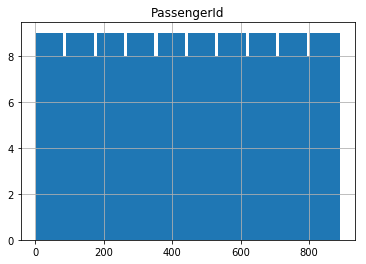

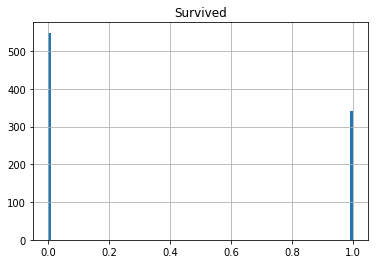

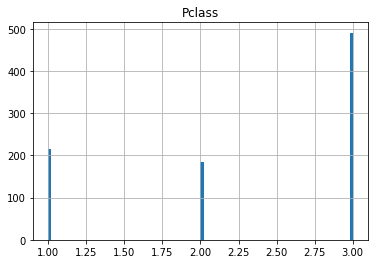

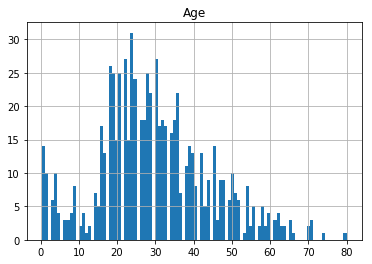

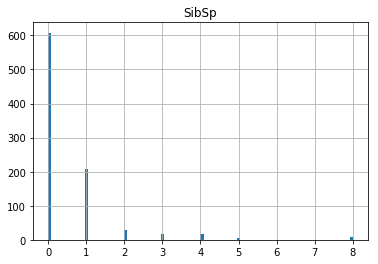

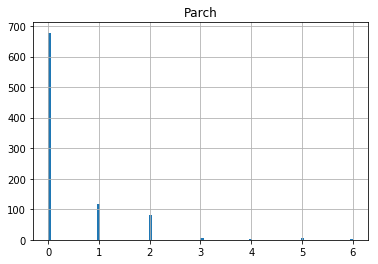

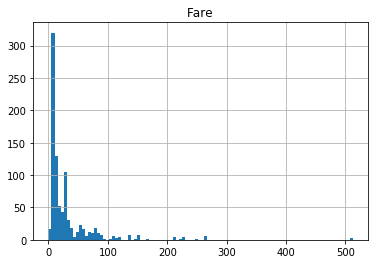

<Figure size 432x288 with 0 Axes>

In [11]:
#Check for skewed distributions
plt.figure()

for col_name, column in data_train.iteritems():
        if column.dtype in ['int64', 'float64']:
            print(col_name)
            data_train[col_name].hist(bins=100)
            plt.title(col_name)
            plt.figure()

# ***Transform***

### Things to do:
1. Check for missing data (done)
1. Remove name (done)
1. Remove id? (done)
1. Hot Hot encode: Sex and Embarked (done)
1. Ordinal: Pclass. Do something
1. Ordinal: age? Is there something to do here?
1. Join Sib + PArch?. Think about these
1. take some info out of ticket (removed for now)
1. Take some info out of cabin (removed for now)

In [8]:
data_train_transform = data_train_original.copy()
data_test_transform = data_test_original.copy()

# Split the data into features and target label
name_of_dependent_variable = "SalePrice"

data_train_X_trans = data_train_transform.drop(name_of_dependent_variable, axis = 1)
data_train_y_trans = data_train_transform[name_of_dependent_variable]

data_test_X_trans = data_test_transform

In [11]:
print(data_train_X_trans.shape)
print(data_test_X_trans.shape)
data_train_X_trans.head(2)

(1460, 75)
(1459, 75)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal


In [10]:
#Get rid of some columns with a lot of missing information
#Get rid of useless columns
remove_columns = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
data_train_X_trans.drop(remove_columns, axis=1, inplace=True)
data_test_X_trans.drop(remove_columns, axis=1, inplace=True)

In [12]:
#get list of categorical columns
categorical_cols = data_train_X_trans.columns[data_train_X_trans.dtypes == 'object']

#get list of numerical columns
numerical_cols = data_train_X_trans.columns[~(data_train_X_trans.dtypes == 'object')]

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

#Define steps for categorical columns
category_imputer_step = ('imputer', SimpleImputer(strategy='constant',
                   fill_value='MISSING'))

category_onehot_step = ('onehot', OneHotEncoder(sparse=False,
                    handle_unknown='ignore'))

categorical_steps = [category_imputer_step, category_onehot_step]
categorical_pipe = Pipeline(categorical_steps)
all_categorical_transformer = ('cat', categorical_pipe, categorical_cols)

#define steps for numerical columns
numerical_imputer_step = ('imputer', SimpleImputer(strategy='median'))
numerical_steps = [numerical_imputer_step]
numerical_pipe = Pipeline(numerical_steps)
all_numerical_transformer = ('numerical', numerical_pipe, numerical_cols)

list_of_all_transformer_tuples=[all_categorical_transformer, all_numerical_transformer]


transformer = ColumnTransformer(transformers=list_of_all_transformer_tuples)


In [14]:
data_train_X = transformer.fit_transform(data_train_X_trans)
data_test_X = transformer.transform(data_test_X_trans)

In [28]:
#DEBUG OF ColumnTransformer AND Pipelines

transformer.named_transformers_['cat'].named_steps['onehot'].get_feature_names()

array(['x0_C (all)', 'x0_FV', 'x0_RH', 'x0_RL', 'x0_RM', 'x1_Grvl',
       'x1_Pave', 'x2_IR1', 'x2_IR2', 'x2_IR3', 'x2_Reg', 'x3_Bnk',
       'x3_HLS', 'x3_Low', 'x3_Lvl', 'x4_AllPub', 'x4_NoSeWa',
       'x5_Corner', 'x5_CulDSac', 'x5_FR2', 'x5_FR3', 'x5_Inside',
       'x6_Gtl', 'x6_Mod', 'x6_Sev', 'x7_Blmngtn', 'x7_Blueste',
       'x7_BrDale', 'x7_BrkSide', 'x7_ClearCr', 'x7_CollgCr',
       'x7_Crawfor', 'x7_Edwards', 'x7_Gilbert', 'x7_IDOTRR',
       'x7_MeadowV', 'x7_Mitchel', 'x7_NAmes', 'x7_NPkVill', 'x7_NWAmes',
       'x7_NoRidge', 'x7_NridgHt', 'x7_OldTown', 'x7_SWISU', 'x7_Sawyer',
       'x7_SawyerW', 'x7_Somerst', 'x7_StoneBr', 'x7_Timber',
       'x7_Veenker', 'x8_Artery', 'x8_Feedr', 'x8_Norm', 'x8_PosA',
       'x8_PosN', 'x8_RRAe', 'x8_RRAn', 'x8_RRNe', 'x8_RRNn', 'x9_Artery',
       'x9_Feedr', 'x9_Norm', 'x9_PosA', 'x9_PosN', 'x9_RRAe', 'x9_RRAn',
       'x9_RRNn', 'x10_1Fam', 'x10_2fmCon', 'x10_Duplex', 'x10_Twnhs',
       'x10_TwnhsE', 'x11_1.5Fin', 'x11_1.5Unf'

In [29]:
print(data_train_X.shape)
print(data_test_X.shape)
df = pd.DataFrame(data_train_X)
#print((df.isnull().sum()/len(df.index))*100)

(1460, 282)
(1459, 282)


In [72]:
data_train_X[data_train_X<0]

array([], dtype=float64)

In [84]:
#columns = transformer.named_transformers_['cat'].named_steps['onehot'].get_feature_names()

#columns = transformer.get_feature_names()

#data_train = pd.DataFrame(data_train_after, columns=columns)

## ***Split data***

In [30]:
X_kaggle_test = data_test_X.copy()

data_train_y = data_train_y_trans

#Now split the training data into training and validation
X_train, X_validate, y_train, y_validate = train_test_split(data_train_X, data_train_y, test_size=0.01, random_state=42)


(num_records, num_indy_variables) = data_train_X.shape

## ***Check data again before ML***

In [31]:
print(X_train.shape)
print(X_validate.shape)
print(X_kaggle_test.shape)
print(y_train.shape)
print(y_validate.shape)


(1445, 282)
(15, 282)
(1459, 282)
(1445,)
(15,)


In [32]:
#Check for NaNs
print(X_train.isnull().sum().sum())
print(X_validate.isnull().sum().sum())
print(X_kaggle_test.isnull().sum().sum())
print(y_train.isnull().sum().sum())
print(y_validate.isnull().sum().sum())

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

# ***Machine Learning Infrastructure***

In [76]:
mod = LinearRegression()

mod.fit(X_train, y_train)

pred = mod.predict(X_train)

In [90]:
pred[pred<50000]

array([20351.64794922, 45102.64794922, 43361.64794922, 44513.14794922])

In [98]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, accuracy_score, make_scorer, get_scorer
from sklearn.metrics import mean_squared_log_error, mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

In [93]:
#scorer = make_scorer(fbeta_score, beta=0.5)
#scorer = make_scorer(accuracy_score)
scorer = make_scorer(mean_squared_error)

In [115]:
# create a dict of standard models to evaluate {name:object}
def define_models(models=dict()):
 
    model_Linear = LinearRegression()
    models["Linear"] = {}
    models["Linear"]["estimator"] = model_Linear
    
    model_Lasso = Lasso(random_state=100)
    models["Lasso"] = {}
    models["Lasso"]["estimator"] = model_Lasso
    
    model_Ridge = Ridge(random_state=100)
    models["Ridge"] = {}
    models["Ridge"]["estimator"] = model_Ridge
    
    
    model_ElasticNet = ElasticNet(l1_ratio=0.5, fit_intercept=True, random_state=100)
    models["ElasticNet"] = {}
    models["ElasticNet"]["estimator"] = model_ElasticNet
    models["ElasticNet"]["params"] = {}
    models["ElasticNet"]["params"] = {'l1_ratio': randint(0, 1), 
                                 'fit_intercept': ["True", "False"]}
        
    return models

In [59]:
def pipeline_normalize(model):
	steps = list()
	# normalization
	steps.append(('normalize', MinMaxScaler()))
	# the model
	steps.append(('model', model))
	# create pipeline
	pipeline = Pipeline(steps=steps)
	return pipeline

def pipeline_empty(model):
	steps = list()
	# the model
	steps.append(('model', model))
	# create pipeline
	pipeline = Pipeline(steps=steps)
	return pipeline

In [60]:
# evaluate a single model
def evaluate_model(X, y, model, num_folds, metric, pipe_func):
	# create the pipeline
	pipeline = pipe_func(model)
	# evaluate model
	scores = cross_val_score(pipeline, X, y, scoring=metric, cv=num_folds, n_jobs=-1)
	return scores

In [61]:
def evaluate_dictionary_of_models(X, y, models, pipe_funcs, num_folds=10, metric='accuracy' ):
    results = dict()
    for pipe_func in pipe_funcs:
        print("%s", pipe_func)
        for name, model in models.items():
            # evaluate the model
            scores = evaluate_model(X, y, model["estimator"], num_folds, metric, pipe_func)
            # show process
            if scores is not None:
                # store a result
                results[name] = scores
                mean_score, std_score = np.mean(scores), np.std(scores)
                print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
            else:
                print('>%s: error' % name)
    return results

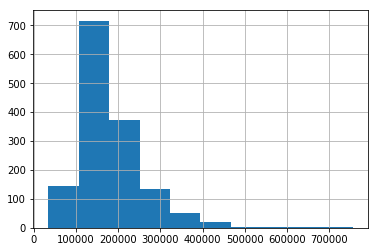

In [56]:
y_train.hist()

In [87]:
max(y_train[:sample_size])

755000

In [113]:
#SPOTCHECK MODELS

spotcheck_percent_of_dataset = 100

len_full_dataset = len(X_train)
sample_size = int((len_full_dataset/100)*spotcheck_percent_of_dataset)
print(len_full_dataset)
print(sample_size)

pipe_funcs = [pipeline_empty]
models = define_models()

evaluate_dictionary_of_models(X=X_train[:sample_size], y=y_train[:sample_size], pipe_funcs=pipe_funcs, models=models, num_folds=5, metric=scorer)


1445
1445
%s <function pipeline_empty at 0x00000063490F6E18>
>Linear: 1845720780734425856.000 (+/-1969013147214297344.000)
>Lasso: 1247266707.528 (+/-918762922.597)
>Ridge: 1219550958.327 (+/-928647681.951)
>ElasticNet: 1454503762.089 (+/-1055547205.089)


{'Linear': array([3.79296372e+18, 5.23598027e+16, 4.65356300e+18, 5.96464225e+17,
        1.33253159e+17]),
 'Lasso': array([7.73255227e+08, 6.84703414e+08, 3.02322079e+09, 1.23261817e+09,
        5.22535931e+08]),
 'Ridge': array([8.34696610e+08, 9.16253335e+08, 3.04723102e+09, 8.52461202e+08,
        4.47112627e+08]),
 'ElasticNet': array([1.19899798e+09, 1.13926917e+09, 3.51284412e+09, 8.88188420e+08,
        5.33219127e+08])}

In [117]:
#GRIDSEARCH (RANDOM SEARCH)

#Pick the top models
#selected_models = ["AdaBoost", "GradientBoosting"]
selected_models = ["ElasticNet"]
models = define_models()

gridsearch_percent_of_dataset = 100 

len_full_dataset = len(X_train)
sample_size = int((len_full_dataset/100)*gridsearch_percent_of_dataset)
print(len_full_dataset)
print(sample_size)

for selected_model in selected_models:
    models[selected_model]["grid_obj"] = RandomizedSearchCV(estimator=models[selected_model]["estimator"],param_distributions=models[selected_model]["params"],n_iter=10, scoring=scorer, cv=5 )
    models[selected_model]["grid_fit"]  = models[selected_model]["grid_obj"].fit(X_train[:sample_size], y_train[:sample_size])

1445
1445


C:\Users\Fergus\.conda\envs\uci_env\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Fergus\.conda\envs\uci_env\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Fergus\.conda\envs\uci_env\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Fergus\.conda\envs\uci_env\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objectiv

C:\Users\Fergus\.conda\envs\uci_env\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Fergus\.conda\envs\uci_env\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Fergus\.conda\envs\uci_env\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Fergus\.conda\envs\uci_env\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objectiv

In [118]:
for selected_model in selected_models:
    print(models[selected_model]["grid_obj"].best_score_)

1546831680.5311778


<bound method BaseSearchCV.score of RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=100, selection='cyclic', tol=0.0001, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'l1_ratio': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000006348DB90B8>, 'fit_intercept': ['True', 'False']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn',
          scoring=make_scorer(mean_squared_error), verbose=0)>

In [120]:
#Finally Test our best models against the validate set
for selected_model in selected_models:
    optimised_classifier = models[selected_model]["grid_fit"].best_estimator_
    #Refit the classifier
    optimised_classifier.fit(X_train, y_train)
    # Make predictions and score using the optimised model
    score = scorer(estimator=optimised_classifier, X=X_validate, y_true=y_validate)
    predictions = optimised_classifier.predict(X_kaggle_test)
    print('Optimised %s> testing data: %.3f' % (selected_model, score))

Optimised ElasticNet> testing data: 815667204.696


C:\Users\Fergus\.conda\envs\uci_env\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [127]:
submission = pd.DataFrame({'Id':data_test_original['Id'],'SalePrice':predictions})
filename = 'HousePrice_Predictions.csv'                          
submission.to_csv(out_directory + filename,index=False)                          